In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Classification\diabetes.csv")

In [3]:
df.head(4)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

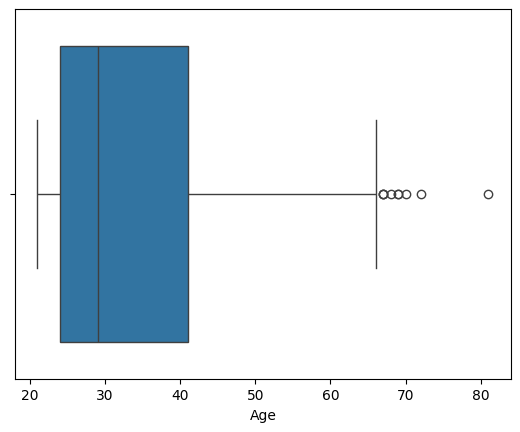

In [5]:
sns.boxplot(x='Age', data=df)
plt.show()

In [6]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

iqr = q3 - q1

min_range = q1 - (1.5*iqr)
max_range = q3 + (1.5*iqr)

df = df[df['DiabetesPedigreeFunction'] <= max_range]

In [7]:
df.isnull().sum().sum()

np.int64(0)

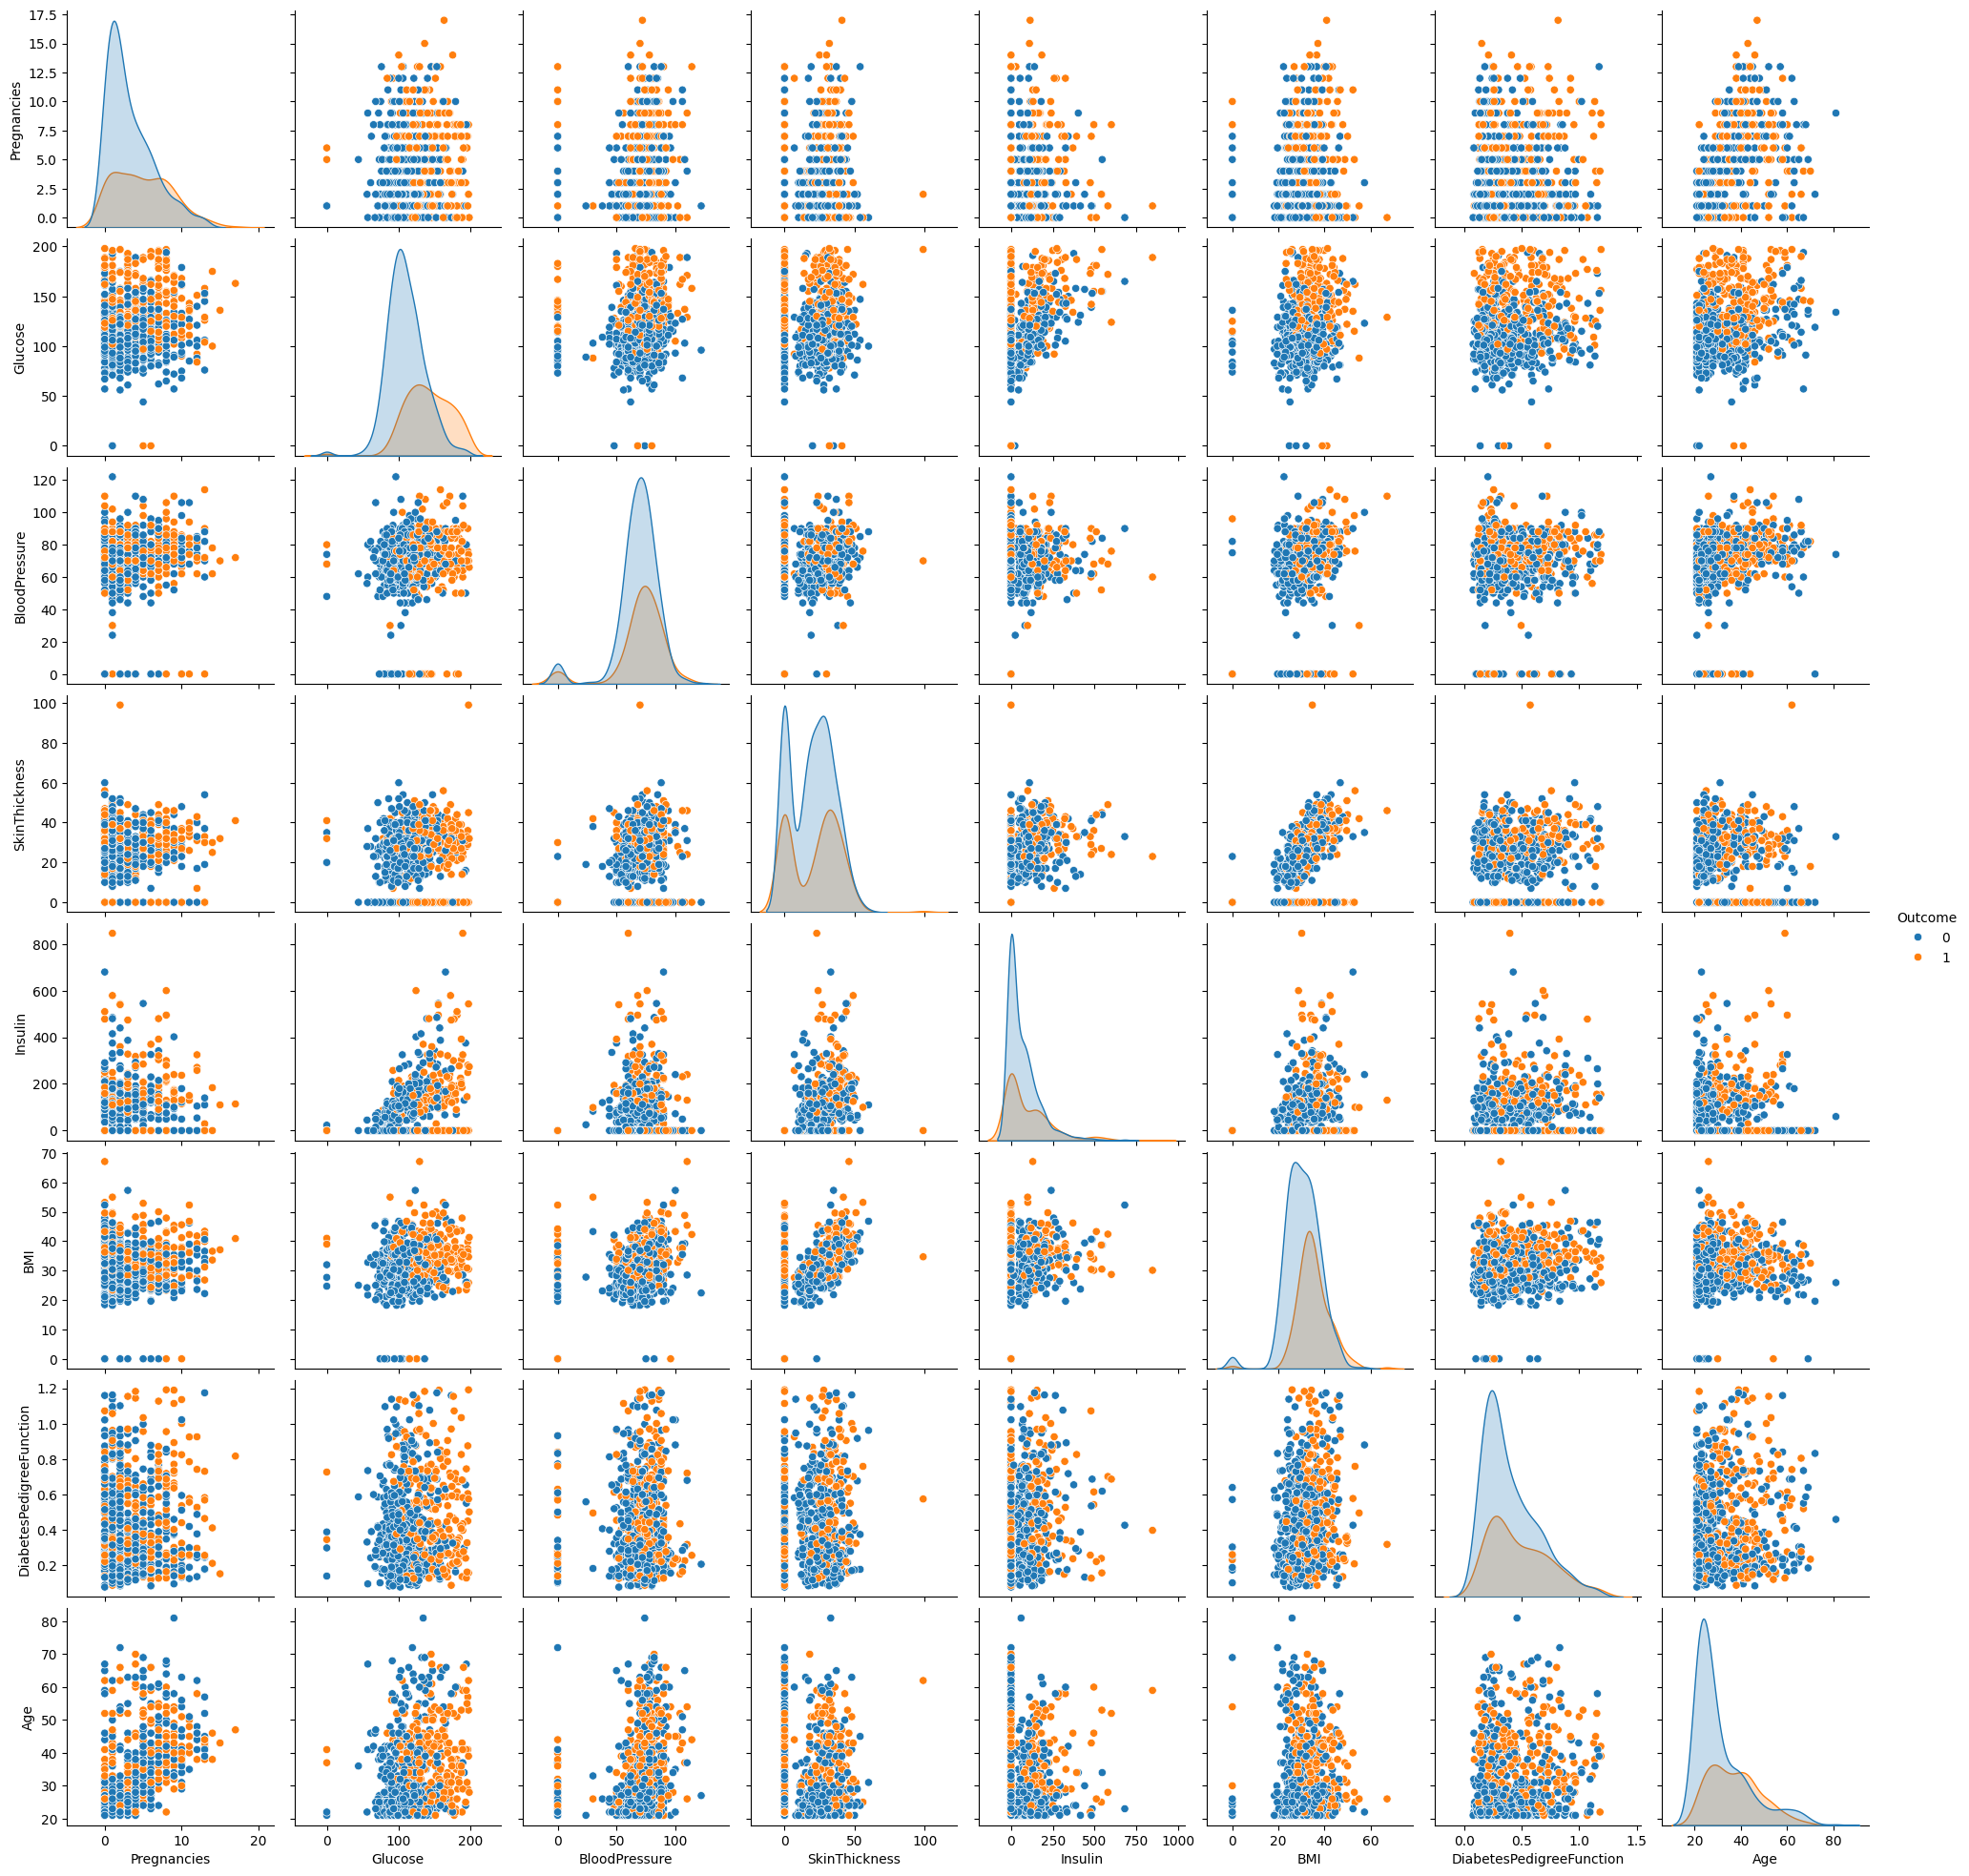

In [8]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

In [9]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

ft = FunctionTransformer(func=np.log1p, validate=True)
mms = MinMaxScaler()

In [11]:
x_new = x
for col in x.select_dtypes(include=['int64', 'float64']).columns:
    mms.fit(x[[col]])
    x_new[col] = mms.transform(x[[col]])

In [12]:
x_new.head(3)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.352941  0.747475       0.590164       0.353535      0.0  0.500745   
1     0.058824  0.429293       0.540984       0.292929      0.0  0.396423   
2     0.470588  0.924242       0.524590       0.000000      0.0  0.347243   

   DiabetesPedigreeFunction       Age  
0                  0.493261  0.483333  
1                  0.245283  0.166667  
2                  0.533693  0.183333

In [13]:
x_new.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   739.000000  739.000000     739.000000     739.000000  739.000000   
mean      0.227573    0.607762       0.565518       0.204836    0.092557   
std       0.198246    0.159693       0.160372       0.160832    0.133222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.500000       0.508197       0.000000    0.000000   
50%       0.176471    0.585859       0.590164       0.232323    0.027187   
75%       0.352941    0.707071       0.655738       0.323232    0.148936   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  739.000000                739.000000  739.000000  
mean     0.475999                  0.316112    0.203721  
std      0.116078                  0.224334    0.196603  
min      0.000000                  0.000000    0.000000  
25%      0.406855                  0.143756    0.050000  
50%      0.476900                  0.249775    0.133333  
75%      0.543219                  0.457323    0.333333  
max      1.000000                  1.000000    1.000000

In [14]:
df['Outcome'].value_counts()

Outcome
0    488
1    251
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
lr.score(x_test, y_test)*100

20.915107578861914

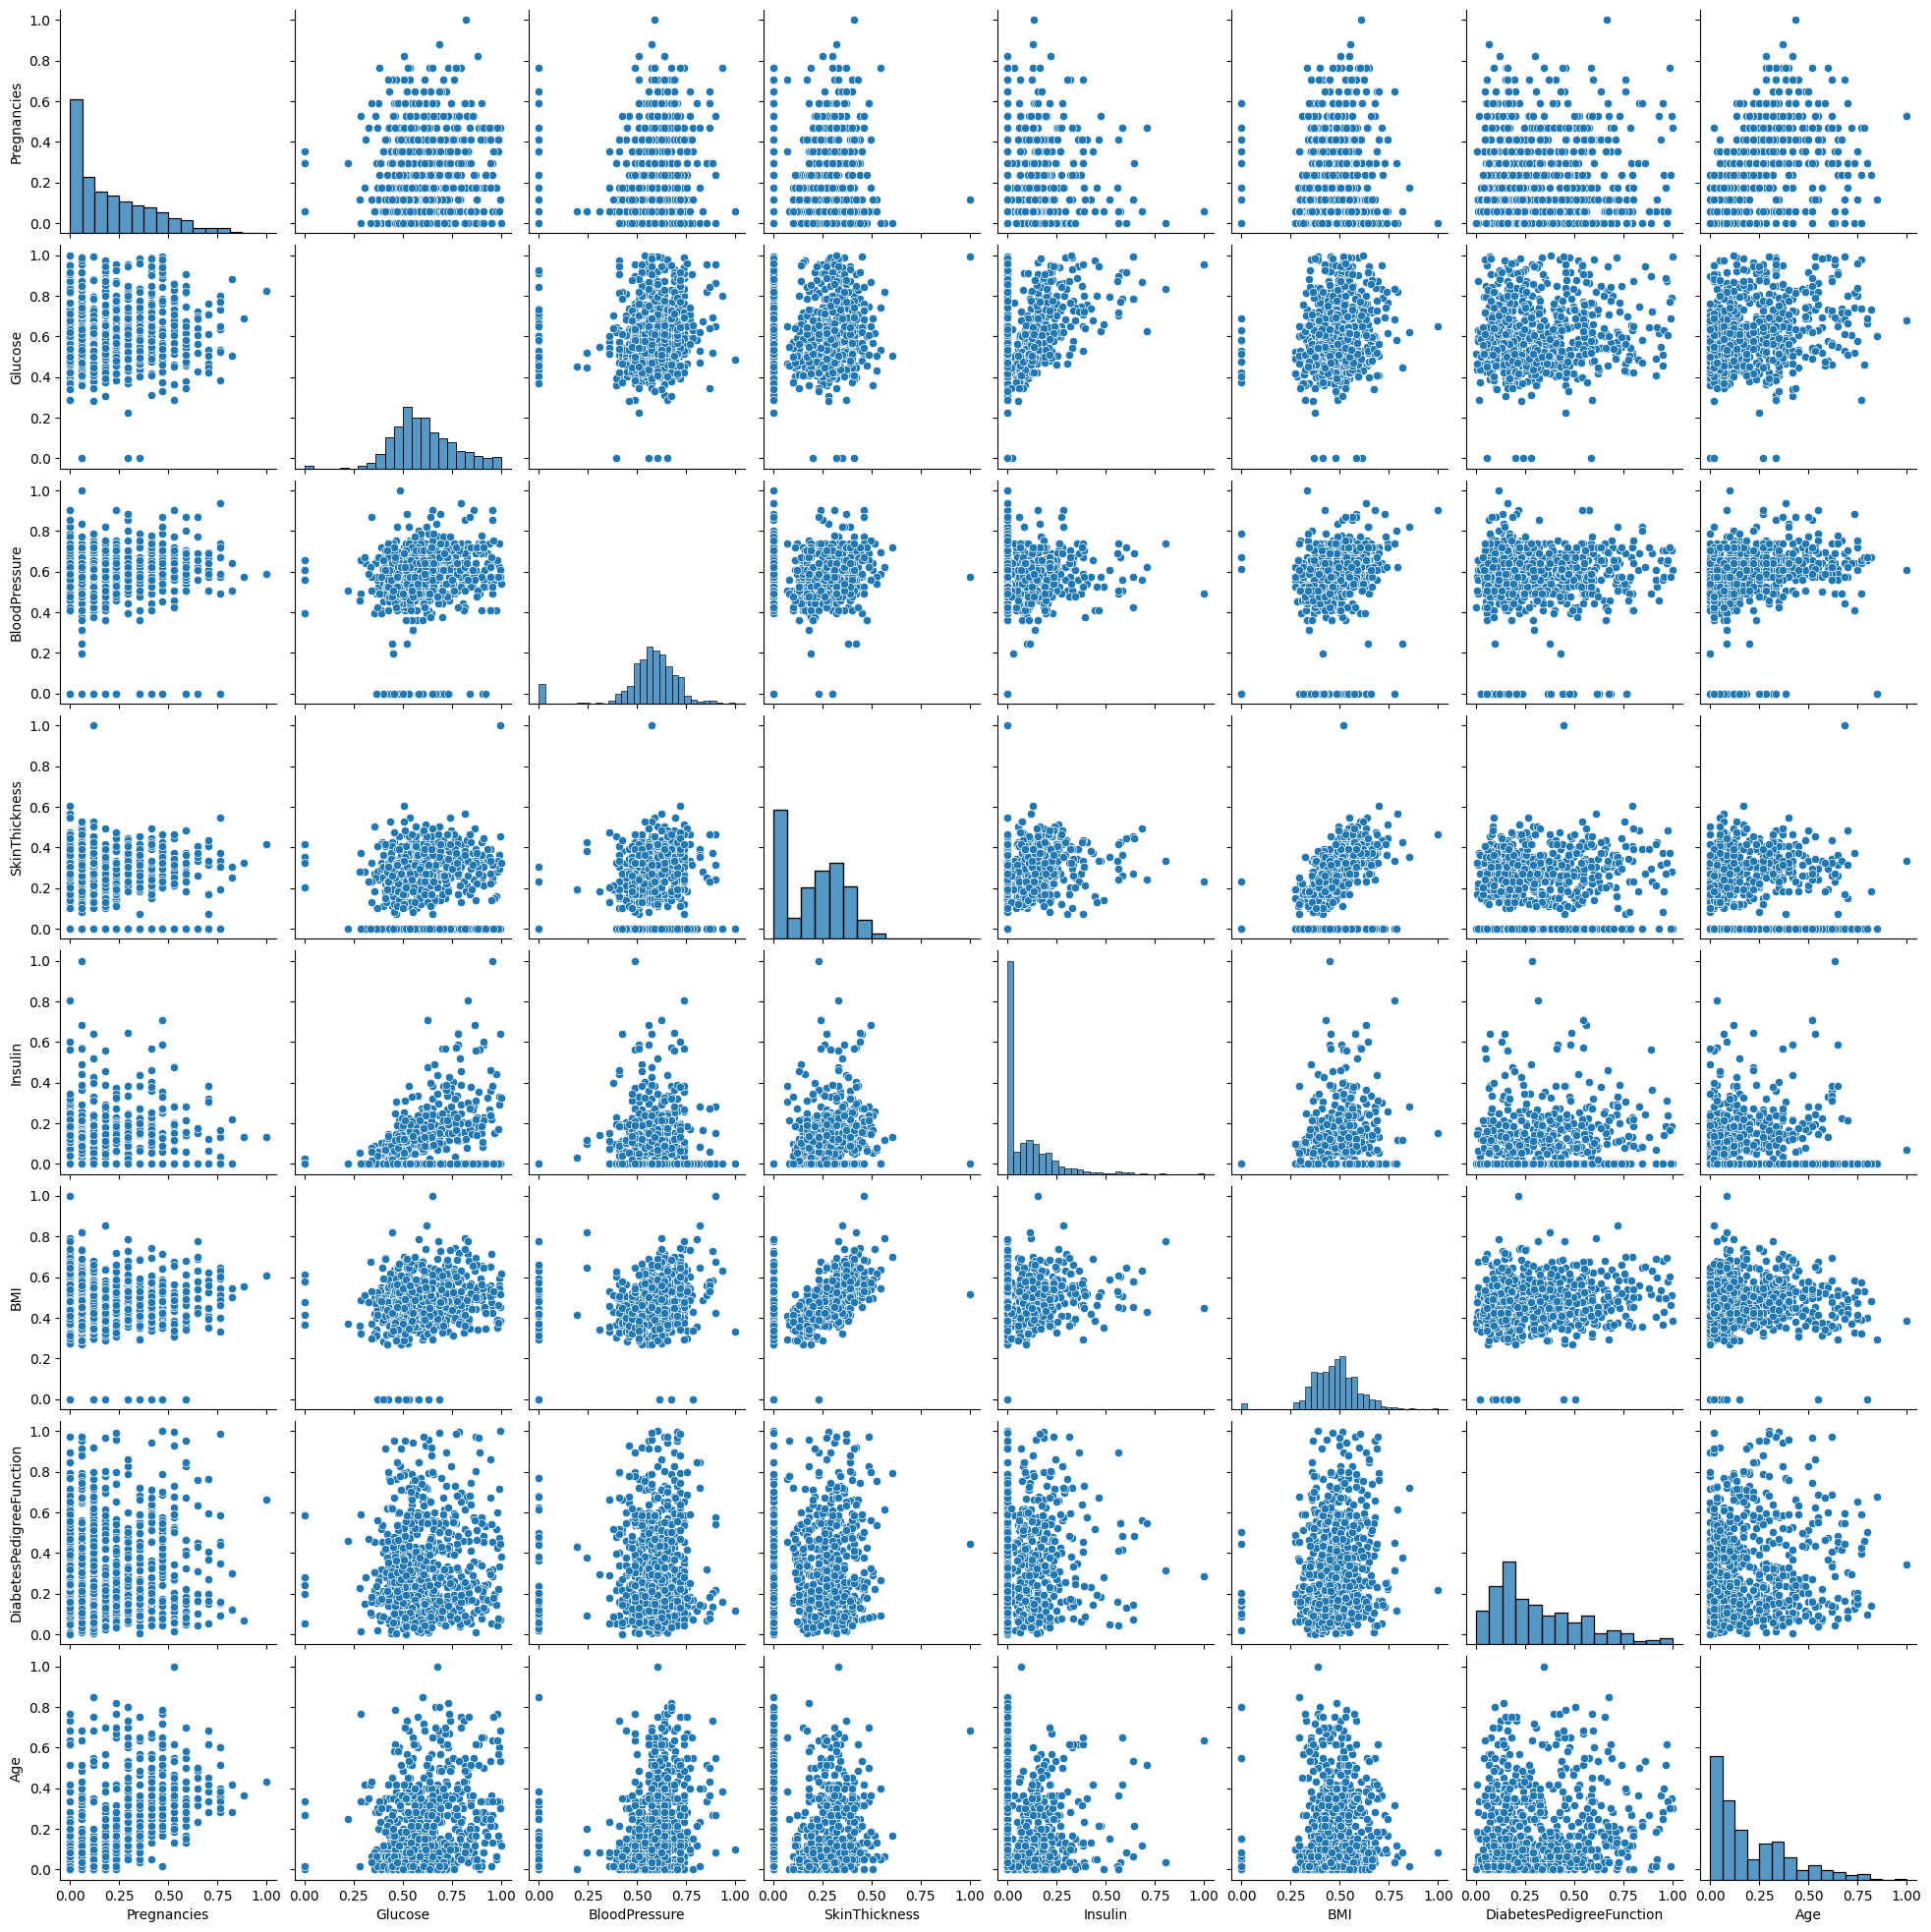

In [18]:
sns.pairplot(data=x)
plt.show()

## Handling Imbalanced Data

### Under Sampling Technique

In [19]:
from imblearn.under_sampling import RandomUnderSampler

ru = RandomUnderSampler()
ru.fit(x, y)

RandomUnderSampler()

In [20]:
ru_x, ru_y = ru.fit_resample(x, y)

In [21]:
ru_y.value_counts()

Outcome
0    251
1    251
Name: count, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(ru_x, ru_y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
lr.score(x_test, y_test)*100

29.584397127997242

### Over Sampling Technique

In [24]:
from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler()
ro.fit(x, y)
ro_x, ro_y = ro.fit_resample(x, y)

In [25]:
ro_y.value_counts()

Outcome
1    488
0    488
Name: count, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
lr.score(x_test, y_test)*100

22.80371105247986